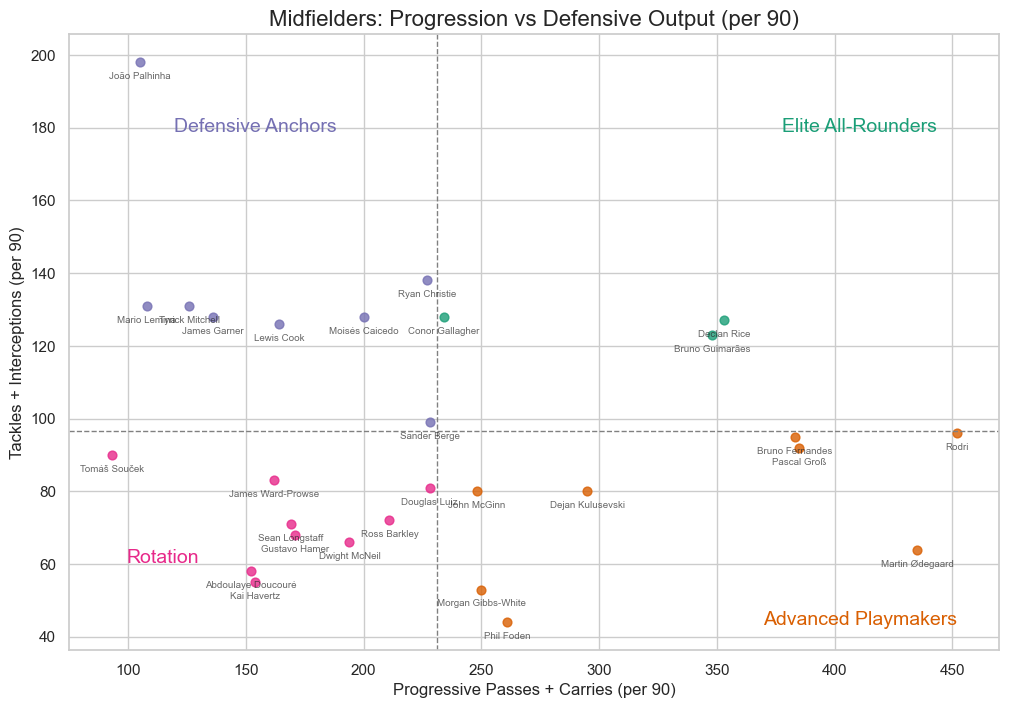

In [51]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_std = pd.read_csv("../../midfielder_style_map/data/standard_stats_selected_players.csv")
df_def = pd.read_csv("../../midfielder_style_map/data/defensive_stats_selected_players.csv")

# Filter & prepare
df_std['Min'] = pd.to_numeric(df_std['Min'], errors='coerce')
df_std = df_std[df_std['Min'] >= 90].copy()
df = pd.merge(df_std, df_def[['Player','Tkl','Int']], on='Player', how='inner')

# Compute scores
df['Progression_Score'] = df['PrgP'] + df['PrgC']
df['Defensive_Score']  = df['Tkl']  + df['Int']

# Plot setup
fig, ax = plt.subplots(figsize=(12, 8))
x_avg = df['Progression_Score'].mean()
y_avg = df['Defensive_Score'].mean()
ax.axvline(x=x_avg, color='grey', linestyle='--', linewidth=1)
ax.axhline(y=y_avg, color='grey', linestyle='--', linewidth=1)

# Plot & annotate
for _, row in df.iterrows():
    x, y = row['Progression_Score'], row['Defensive_Score']
    # pick color as before…
    if   x>=x_avg and y>=y_avg: c='#1b9e77'
    elif x>=x_avg:               c='#d95f02'
    elif y>=y_avg:               c='#7570b3'
    else:                        c='#e7298a'

    ax.scatter(x, y, color=c, s=40, alpha=0.8)
    ax.annotate(
        row['Player'],
        xy=(x,y),
        xytext=(0, -7),               # 7 points below
        textcoords="offset points",    # interpret xytext in points
        ha="center", va="top",         # horizontally center, vertical top alignment
        fontsize=7, alpha=0.7
    )

# Get plot limits & compute a small vertical offset
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
y_off = 0.02 * (ymax - ymin)  # 2% of the y-range

# Quadrant annotations (as before)
dx = 0.05 * (xmax - xmin)
dy = 0.05 * (ymax - ymin)

# Quadrant labels in axes‐fraction coords:
ax.text(0.85, 0.85, 'Elite All-Rounders',
        transform=ax.transAxes,
        color='#1b9e77', fontsize=14, ha='center', va='center')

ax.text(0.85, 0.05, 'Advanced Playmakers',
        transform=ax.transAxes,
        color='#d95f02', fontsize=14, ha='center', va='center')

ax.text(0.15 + 0.05, 0.85, 'Defensive Anchors',
        transform=ax.transAxes,
        color='#7570b3', fontsize=14, ha='center', va='center')

ax.text(0.1, 0.15, 'Rotation',
        transform=ax.transAxes,
        color='#e7298a', fontsize=14, ha='center', va='center')


ax.set_title('Midfielders: Progression vs Defensive Output (per 90)', fontsize=16)
ax.set_xlabel('Progressive Passes + Carries (per 90)', fontsize=12)
ax.set_ylabel('Tackles + Interceptions (per 90)', fontsize=12)
ax.grid(True)

# Save & show
plt.savefig("../../midfielder_style_map/visuals/quadrant_map.png", dpi=300, bbox_inches='tight')
plt.show()
